# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/")

In [3]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
})

# LoadData

In [61]:
hic <- read.table("./cleanData/comp/mESC_hic/mESC_HiC_500kb.HiTC.comp.bedgraph")
scopec1M <- read.table("./cleanData/comp/mESC_SCOPEC_1Mand1K/ES1M_SCOPEC_500kb.HiTC.comp.bedgraph")
scopec1K <- read.table("./cleanData/comp/mESC_SCOPEC_1Mand1K/ES1K_SCOPEC_500kb.HiTC.comp.bedgraph")

In [62]:
hela <- read.table("./cleanData/comp/humanCellLine/Hela_1M_HiC_500kb.HiTC.comp.bedgraph")
HS1M <- read.table("./cleanData/comp/humanCellLine/Hela_1M_SCOPEC_500kb.HiTC.comp.bedgraph")
HS1K <- read.table("./cleanData/comp/humanCellLine/Hela_1K_SCOPEC_500kb.HiTC.comp.bedgraph")

# Analysis

In [47]:
library(ggsci)

`summarise()` has grouped output by 'V5.x'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'V5.x'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'V5.x'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'V5.x'. You can override using the `.groups` argument.


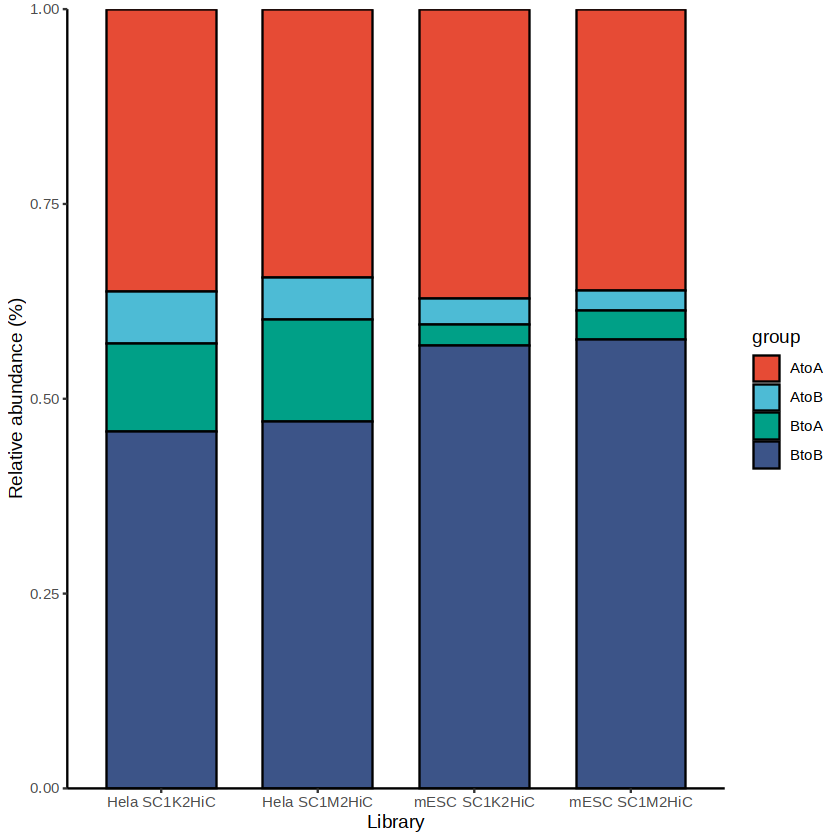

In [63]:
rbind(dplyr::full_join(scopec1M,hic,by=c("V1","V2","V3")) %>% filter(V5.x !=0,V5.y !=0) %>% group_by(V5.x,V5.y) %>% summarise(Count=n()) %>%
mutate(group=paste0(V5.x,"to",V5.y),Library="mESC SC1M2HiC"),
     dplyr::full_join(scopec1K,hic,by=c("V1","V2","V3")) %>% filter(V5.x !=0,V5.y !=0) %>% group_by(V5.x,V5.y) %>% summarise(Count=n()) %>%
mutate(group=paste0(V5.x,"to",V5.y),Library="mESC SC1K2HiC"),
     dplyr::full_join(HS1M,hela,by=c("V1","V2","V3")) %>% filter(V5.x !=0,V5.y !=0) %>% group_by(V5.x,V5.y) %>% summarise(Count=n()) %>%
mutate(group=paste0(V5.x,"to",V5.y),Library="Hela SC1M2HiC"),
     dplyr::full_join(HS1K,hela,by=c("V1","V2","V3")) %>% filter(V5.x !=0,V5.y !=0) %>% group_by(V5.x,V5.y) %>% summarise(Count=n()) %>%
mutate(group=paste0(V5.x,"to",V5.y),Library="Hela SC1K2HiC")) %>%
ggplot(aes(Library, weight = Count, fill = group)) +
  geom_bar(color = "black", width = .7, position = 'fill') +
  labs( y = 'Relative abundance (%)') +
  scale_fill_npg()+
  scale_y_continuous(expand = c(0,0)) +
  theme_classic()